In [11]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy.stats import ttest_ind

I have taken this dataset from Kaggle and now need to define the questions I want to answer from this dataset. They evaluated the reaction time and working memory of participants in the context of sleep deprivation. One thing I noticed about this dataset is that they did not define which participants were considered sleep deprived.

## What is the Stroop Task?

The Stroop task is a method used in neuroscience and psychology research to evaluate processing speed. In the tests, the word "purple" may be on display in different coloured fonts and participants must state the colour of the word, not the spelled out word. There is often a delay in reaction time to state the colour when the word spells a different colour than the font.

## What is N-Back Accuracy?

N-back accuracy is a way to assess someone's working memory. Participants are presented with a stimulus and then presented with another stimulus at different intervals. Eventually the original stimulus will show up again and the participants must state how far back the original stimulus was presented. This is the "n" number. For example you are presented a picture of a dog, then a picture of a cat, then a frog, then a dog again. The n-back from the dog is 2. The longer the interval between the original stimulus, the more difficult the task.

## Questions and Defining the Data:

Since I do not know how the study was performed and if the participants who got 8 hours or more of sleep are considered a control group, I am going to define anyone who got less than 7.0 hours of sleep as sleep deprived, and anyone who received more are a control group.

I think the easiest thing to start with the information presented is to define specific questions:

- How many hours did sleep-deprived vs. control sleep?
- How was the sleep quality between sleep-deprived vs. control?
- Were there differences in the stroop-task reaction times? What if we normalized to the number of hours slept?
- Were there differences in N-back accuracy? What if we normalized it to the number of hours slept?
- Is there a correlation between stress levels and sleep quality?

In [2]:
Path.cwd()
print(Path.cwd())


/home/moomin


In [ ]:
#Open the file

path = "/home/moomin/Desktop/Kaggle Datasets/sleep_deprivation_dataset_detailed.csv"
df = pd.read_csv(path)
df.head(10)

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14
5,P6,3.94,12,6,2.84,58.80,46,224.48,28,Male,32.23,3,6,29
6,P7,3.35,8,18,3.16,50.90,31,201.56,22,Male,32.74,4,5,16
7,P8,8.20,14,21,3.28,74.69,66,388.37,29,Male,32.25,1,0,4
8,P9,6.61,12,1,1.74,58.94,38,258.28,20,Female,25.24,3,4,28
9,P10,7.25,0,9,2.61,68.32,23,221.28,18,Male,21.78,3,4,3


The mean of sleep deprived hours is: 4.868837209302325
The mean control sleep hours is: 8.17470588235294


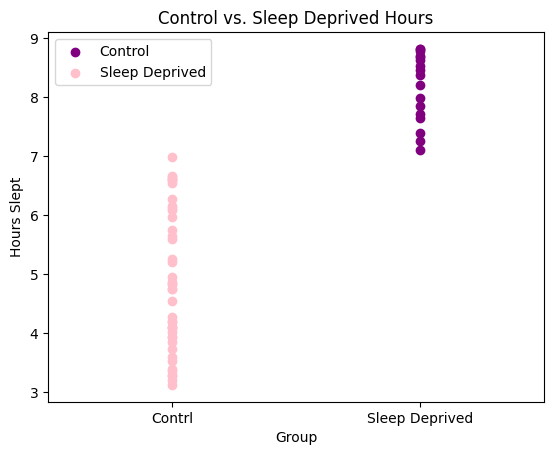

In [21]:
#How many hours did sleep-deprived vs. control sleep?

deprived_hrs_slept = df['Sleep_Hours'][df['Sleep_Hours']<7.0] #create sleep deprived variable
ctrl_hrs_slept = df['Sleep_Hours'][df['Sleep_Hours']>7.0] #create control variable

x_deprived_hrs_slept = [0]*len(deprived_hrs_slept)
x_ctrl_hrs_slept = [1]*len(ctrl_hrs_slept)

mean_deprived_hrs_slept = np.mean(deprived_hrs_slept) #get the mean
mean_ctrl_hrs_slept = np.mean(ctrl_hrs_slept)
print('The mean of sleep deprived hours is:', mean_deprived_hrs_slept) #print the means
print('The mean control sleep hours is:', mean_ctrl_hrs_slept)

plt.scatter(x_ctrl_hrs_slept, ctrl_hrs_slept, label='Control', color='purple') #plot the graph
plt.scatter(x_deprived_hrs_slept, deprived_hrs_slept, label='Sleep Deprived', color='pink')

plt.title('Control vs. Sleep Deprived Hours') 
plt.xlabel('Group')
plt.ylabel('Hours Slept')
plt.xticks([0,1], ['Contrl', 'Sleep Deprived'])
plt.xlim(-0.5, 1.5)
plt.legend()
plt.show()



In [10]:
#Is the data normally distributed?

stat, p = shapiro(deprived_hrs_slept) #distribution of sleep deprived data
print(f"Shapiro-Wilk Test: statistic={stat}, p-value={p}")

if p < 0.05:
    print("The sleep deprived data is not normally distributed")
else:
    print("The sleep deprived data is normally distriubted")

stat, p = shapiro(ctrl_hrs_slept) #distribution of control data
print(f"Shapiro-Wilk Test: statistic={stat}, p-value={p}")

if p < 0.05:
    print("The control data is not normally distributed")
else:
    print("The control data is normally distriubted")

Shapiro-Wilk Test: statistic=0.9278029087881838, p-value=0.009783537345039473
The sleep deprived data is not normally distributed
Shapiro-Wilk Test: statistic=0.8984735317946047, p-value=0.06404849798189803
The control data is normally distriubted


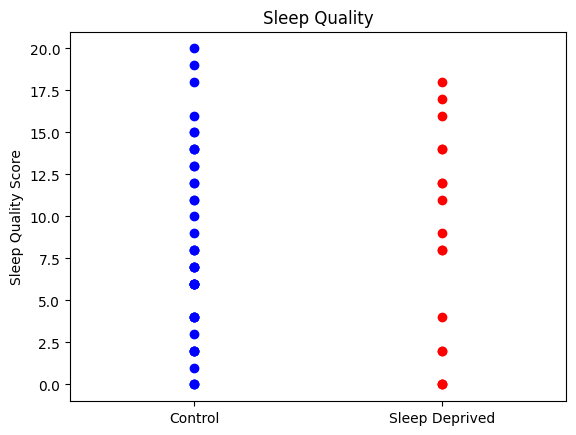

In [30]:
# How was the sleep quality between sleep-deprived vs. control?

sleep_deprived = df[df['Sleep_Hours']<7.0]
deprived_quality = sleep_deprived['Sleep_Quality_Score']

sleep_control = df[df['Sleep_Hours']>7.0]
ctrl_quality = sleep_control['Sleep_Quality_Score']

x_deprived_quality = [0]*len(deprived_quality)
x_ctrl_quality = [1]*len(ctrl_quality)

plt.scatter(x_ctrl_quality, ctrl_quality, label='Control', color='red')
plt.scatter(x_deprived_quality, deprived_quality, label='Sleep Deprived', color='blue')
plt.ylabel('Sleep Quality Score')
plt.title('Sleep Quality')
plt.xticks([0,1], ['Control', 'Sleep Deprived'])
plt.xlim(-0.5, 1.5)
plt.show()

Interestingly, the sleep quality scores do not appear to differ much between the control and sleep-deprived groups. In general, there appears to be a lot of variation.